# Project.1 Digits classification

먼저 데이터를 불러와서 데이터들이 어떻게 생겨먹었는지 봅시다.

In [26]:
#Scikitlearn에서 제공하는 손글씨 데이터를 불러옴
from sklearn.datasets import load_digits

#데이터 셋을 digits에 할당.
digits = load_digits()

In [2]:
#dir 함수를 사용해 데이터셋에서 name space 에 기록된 이름들을 출력합니다.  
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

지금까지 실습해온 바에 따르면 data항목엔 우리가 모델에 훈련시킬 feature 데이터들이 들어있고 

target에서는 정답에 해당하는 label 데이터들이 들어있었습니다.

하지만 모른다고 가정하고 Describe(DESCR)를 보도록 할게요.

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

중요해 보이는 것들을 뽑아서 보면

    --Number of Instances: 1797 (데이터의 갯수 1797개...)
    
    --Number of Attributes: 64  (데이터의 속성(columns)갯수 64개)
    
    --Attribute Information: 8x8 image of integer pixels in the range 0..16. (8*8 픽셀 이미지인데 정수형에 범위는 0~16)
    
    --Missing Attribute Values: None (결측값은 없음)
    
    --The data set contains images of hand-written digits: 10 classes where each class refers to a digit. 
      
      (숫자를 의미하는 10개의 클래스, 숫자  0~9를 의미)

정리하자면 데이터의 갯수는 1797개 속성의 갯수(columns)는 64개라는 어마어마한 데이터입니다.

속성 정보를 보면 8x8 픽셀의 이미지라고 하네요. 그렇다면 데이터의 columns는 **8x8 = 64** 니까

**"8x8픽셀 이미지를 표시하기 위한 데이터들이 들어갔을 것이다"** 라고 생각할 수 있을 겁니다.

혹시 모르니 목록은 한 번 봅시다.

In [4]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

64개의 **픽셀의 위치를 나타내는 문자열**이 **1차원**으로 배열되었네요.

\
\
\
아까 속성 데이터들은 0~16사이의 정수라 했었죠. **digits_data** 라는 변수에 digits의 데이터를 할당해서 보겠습니다.

In [27]:
# digits_data 변수에 digits의 data를 할당. 
digits_data = digits.data
#26번째 데이터의 값을 출력합니다
print(digits_data[25])

[ 0.  0. 12.  8.  8.  7.  0.  0.  0.  3. 16. 16. 11.  7.  0.  0.  0.  2.
 14.  1.  0.  0.  0.  0.  0.  5. 14.  5.  0.  0.  0.  0.  0.  2. 15. 16.
  9.  0.  0.  0.  0.  0.  0.  2. 16.  2.  0.  0.  0.  0.  4.  8. 16.  4.
  0.  0.  0.  0. 11. 14.  9.  0.  0.  0.]


In [10]:
digits_data.shape

(1797, 64)

정말로 0~16사이의 정수가 들어있음을 확인했습니다.

따라서 64개의 데이터는 각 픽셀의 위치마다 0에서 16사이의 정수형 데이터를 저장했네요.

\
\
\
다음으로 **타겟 데이터**는 어떤지 한 번 볼게요. 이름부터 볼까요?

In [11]:
#타겟 데이터의 이름 출력
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


Describe에 나온대로 0~9까지의 정수를 분류하기 위한 name들이네요.
\
\
\
다음은 타겟 데이터가 어떤 모양을 하고 있는지 볼게요.

In [28]:
#digits_label에 데이터셋의 target 데이터 할당.
digits_label = digits.target
#digits_label의 모양 출력.
print(digits_label.shape)

(1797,)


1797개의 행으로만 이루어져 있는 심플한 모습입니다. 아마 판별된 데이터의 0에서 9 사이의 클래스를 분류했겠죠?

확인 해보면?

In [13]:
print(digits_label[88])

6


89번째 데이터는 6으로 분류되었나 봅니다.

# 그럼 우리는 어떤 모델을 사용해야 가장 성능이 좋을까요?
\
\
\
\
지금까지 분류에 적합한 모델을 배웠는데 **Decision Tree모델,Random Forest 모델,SVM 모델,**

**SGD Classifier 모델, Logistic Regression 모델**들이 있었습니다.

**이 많은 모델 중 무엇을 써야 할까요?**


사실 배워가는 입장에서는 모든 모델을 다 써보고 데이터의 적합도가  가장 높은 모델을 선정하고 그 이유를 

이론을 보며 이해 해보는게 가장 좋을 것 같습니다.

물론 사전에 모든 모델의 이론을 정확히 알고 있었다면 어떤 모델을 사용하는게 좋을 지 예측도 해볼 수 있을겁니다.

### 1. Decision Tree모델 사용하기
\
\
Decision Tree모델은 노드의 개수를 늘려 나가면서 가장 적합하게 분류할 수 있는 노드를 찾는 모델입니다.
\
\
먼저 Decision Tree모델을 사용해서 성능을 측정해보겠습니다.

In [38]:
# Decision Tree 모델을 가져옴
from sklearn.tree import DecisionTreeClassifier
#train, test 데이터 분리 >> 이 이후로는 다른 모델을 사용하여 학습시킬 때 분리된 데이터들이 변수에 저장되므로
# 반복해서 함수를 호출 해 줄 필요는 없습니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
#모델 학습
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
#예측 데이터값 지표 출력
#이 이후로는 classification_report를 불러낼 필요가 없습니다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
# accuracy변수에 accuracy()함수에 실제 데이터와 예측 데이터를 비교한 결과를 할당.
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.75      0.81      0.78        37
           2       0.86      0.82      0.84        38
           3       0.84      0.86      0.85        37
           4       0.89      0.87      0.88        38
           5       0.91      0.93      0.92        45
           6       1.00      0.93      0.96        42
           7       0.88      0.88      0.88        26
           8       0.96      0.76      0.85        34
           9       0.71      0.88      0.78        33

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360

0.8694444444444445


## 성능평가  

classification_report함수을 사용해서 지표를 한 번에 확인 했습니다. 

accuracy_score 함수를 사용하여 정확도만을 확인 할 수도 있지만 precision, recall, f1-score 를 확인 했을 때 각 class별 정확도를 

확인 할 수 있기 때문에 classification_report 함수를 사용했습니다.

눈에 띄는건 출력한 accuracy 와 각 부분의 지표가 비슷한 수치인 0.87 이라는 것입니다. 조금 낮은 수치인 것 같습니다.

또한 DecisionTree Model에서 1과 9를 구분하는 데에서 f1-score가 0.78이라는 상대적으로 낮은 수치를 보이고 있습니다.

## Visualization

이 데이터를 학습시킨 결과를 직관적으로 이해하려면 어떻게 시각화를 해야 할까요?

Decision Tree는 test 데이터의 산점도 그래프를 영역별로 구분 한 그림이 가장 직관적으로 와닿을 것 같습니다. 

그럼 어떻게 해야할까요?

구글 신님에게 물어본 결과 다음과 같은 소스 코드를 찾을 수 있었습니다.

이건 날 것 그대로라서 우리가 사용하는 데이터에 맞게 적절하게 변형해주어야 합니다..

그러려면 저 소스 코드를 이해해야겠죠..?  눈물이 앞을 가리는군요

코드를 뜯어봅시다..

### 코드 뜯어보기.

In [19]:
#작성자의 블로그에선 더미데이터를 만들어 피팅하는걸 example로 보여주었습니다.
from sklearn.datasets import make_classification 
# 데이터 갯수는 200, feature종류는 2, 분류할 class는 2개입니다.
# 데이터는 랜덤 함수를 사용하여 생성했습니다.
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


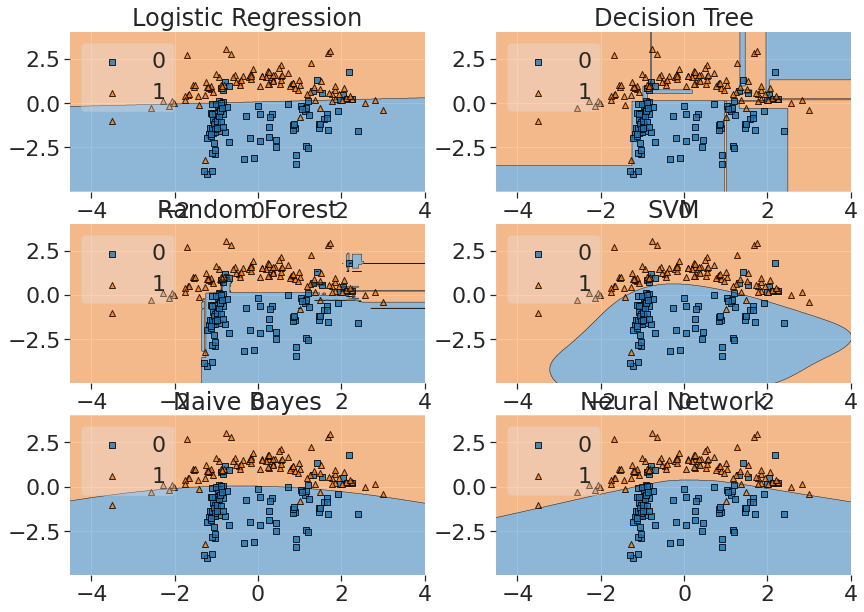

In [113]:
#!pip install mlxtend 한번 설치해 놨기에 주석처리. 
# 이 코드를 재현하고 싶다면 #을 제거하시면 됩니다.
# 이 코드를 실행하기 위해서는 mlxtend 라이브러리를 추가해야 합니다.

#아래의 코드는 머신러닝 모듈을 추가한 것입니다.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
# Initializing Classifiers
# 분류 모델을 만들어 줍니다.
#1. 로지스틱 회귀 2. DecisionTreee 3. RandomForest 4.SVC 5. GaussianNB 6.MLPClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(gamma='auto')
clf5 = GaussianNB()
clf6 = MLPClassifier()

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
#matplotlib.gridspec 모듈을 gridspec으로 정의합니다.
import matplotlib.gridspec as gridspec
%matplotlib inline
# 그래프를 그리기 위한 코드입니다.

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14,10))
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
#for 문을 사용하여 각각의 모델들을 한 번에 학습시키고 플로팅할 위치를 정해줍니다.
#한 번에 하나씩 그릴거라면 for문 아래의 코드를 사용하면 될 것 같습니다.
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

소스코드(Source code) 출처 : https://python.plainenglish.io/decision-boundary-in-python-41ab212cb0e7

우리는 지금 DecisionTree를 플로팅하려고 하니 for문 아래의 코드를 적절하게 떼어다 사용하면 될 것 같습니다.

ValueError: Filler values must be provided when X has more than 2 training features.

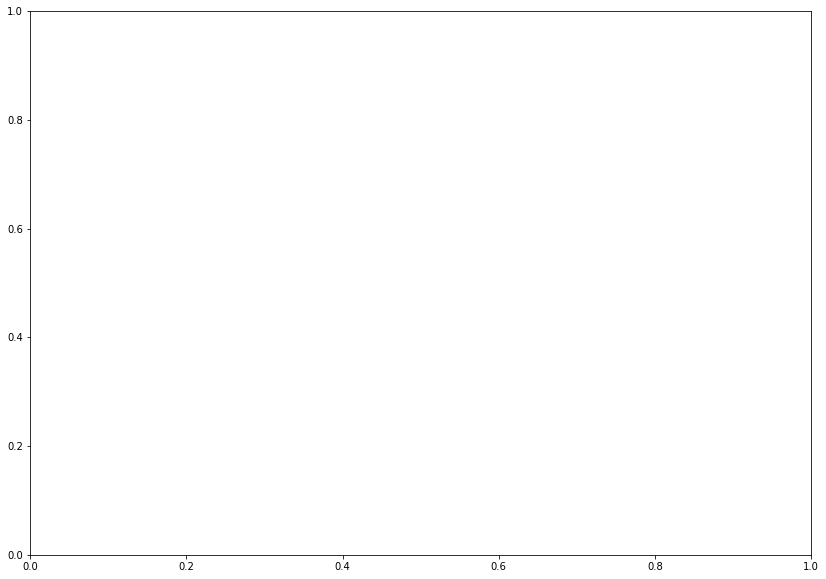

In [22]:
#변수명 정리 
# clf = 학습시킬 모델    
#ax = 그래프를 그릴 위치 
#gs = 그래프를 그릴 배열 >>> 혹시 모르니 (1,)로 지정
#lab = labels : 제목으로 붙일 문자열들. >> 직접 적는다.
#X,Y = 테스트 시킬 feature, label데이터  >> 각각 X_test,
#!pip install mlxtend
import matplotlib.pyplot as plt
decision_tree = DecisionTreeClassifier()

from mlxtend.plotting import plot_decision_regions
#matplotlib.gridspec 모듈을 gridspec으로 정의합니다.
import matplotlib.gridspec as gridspec
%matplotlib inline
# 그래프를 그리기 위한 코드입니다.
gs = gridspec.GridSpec(1,1)
#그래프의 칸 수를 지정하는 듯 합니다.
fig = plt.figure(figsize=(14,10))
    
    
decision_tree.fit(X_train, y_train)
#그래프를 그리는 코드. X축은 테스트 시킬 feature,Y축은 예측된 label, clf는 피팅시킨 값인듯 합니다.
fig = plot_decision_regions(X_test, y_pred , clf=decision_tree.fit(X_train, y_train), legend=2)

~쳇, 결계인가~

하지만 뭔가에 막혀서 안됩니다.

그래서 다시 구글링을 해봤습니다.

소스코드(Source Code)출처:
https://stackoverflow.com/questions/52952310/plot-decision-regions-with-error-filler-values-must-be-provided-when-x-has-more

/opt/conda/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

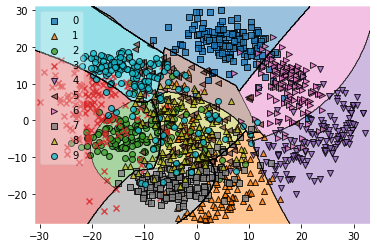

In [23]:
#답변 내용 요약 > 이거 쓰면 plot_decision_regions 함수에서 filler value 라는걸 쓸 필요가 없다 합니다.
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

저 페이지에서 저와 비슷한 에러가 발생해서 그래프를 그릴수 없다는거 같은데, 답변을 주신 분이 어떤 코드를 추가해주셨습니다.

In [33]:
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)

PCA가 뭔지 검색해보니 '고차원 배열을 저차원'으로 만들어준다 합니다.

아하 아까 그래서 'ValueError: Filler values must be provided when X has more than 2 training features.' 요런 에러문구가 나왔나 봅니다.

그래서 저 코드를 가지고 다시 해봤습니다.

/opt/conda/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Text(0.5, 1.0, 'DecisionTreeClassifier Region Boundary')

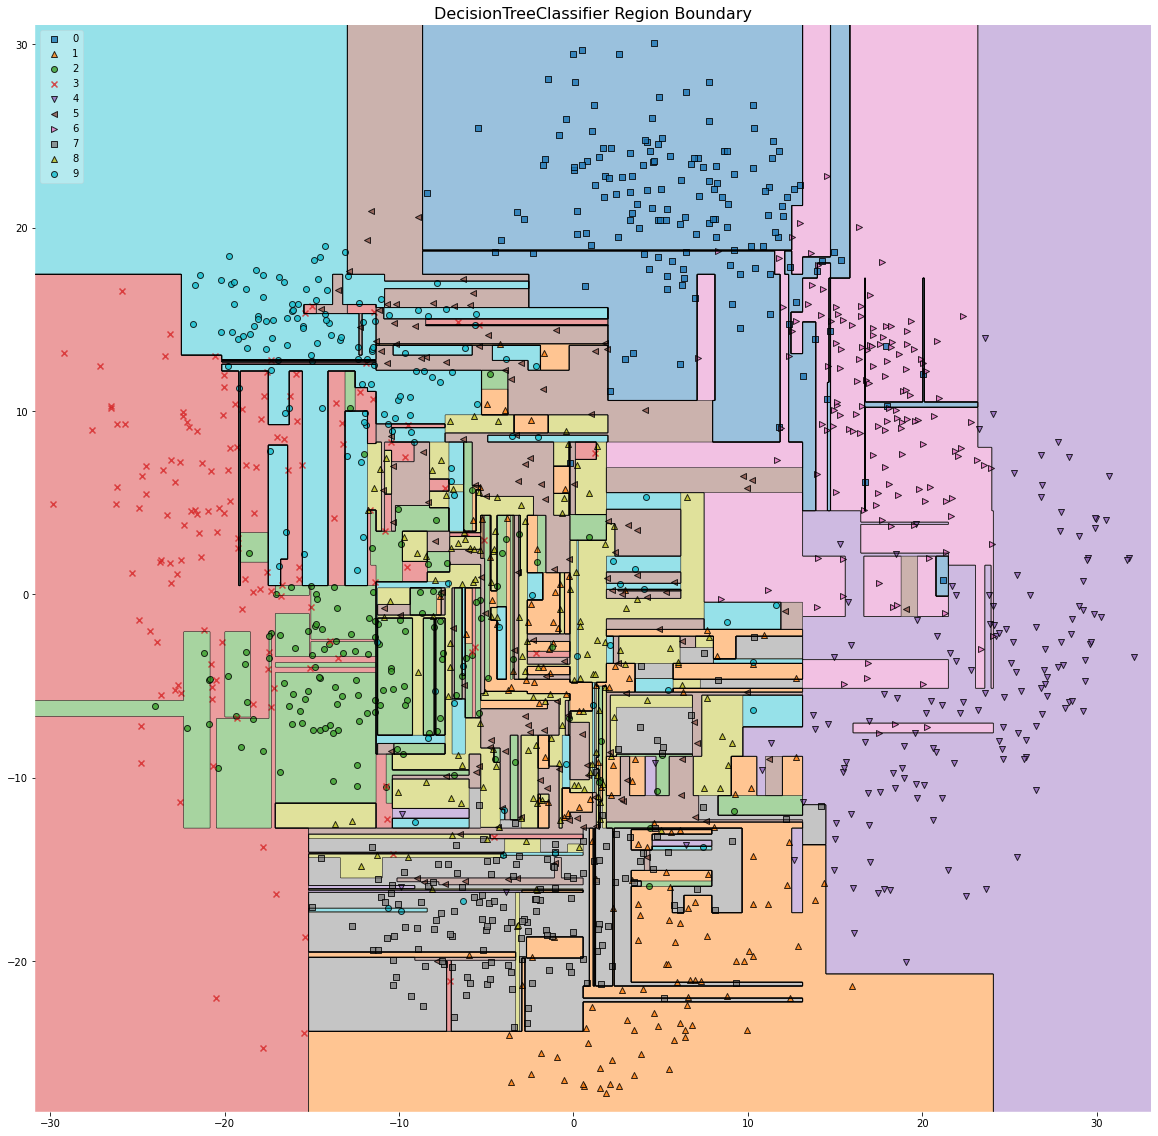

In [40]:
# 사이킷 런 sklearn.decomposition에서 PCA함수를 들고 왔습니다.
#!pip install mlxtend
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
#matplotlib.gridspec 모듈을 gridspec으로 정의합니다.
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,20)) #figure size 지정.
clf = DecisionTreeClassifier()

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('DecisionTreeClassifier Region Boundary', size=16)

이 그래프는 모델의 피팅결과를 보여주는 그래프입니다. 위의 코드에서 Train2 항목을 Test로 바꿔준다면 테스트 결과를 이미지화 할 수 있습니다.

# 그래프가 그려졌습니다!

하지만 분류할 class와 데이터의 개수(※360개)가 너무 많은 탓에 영역을 표현해서 그래프로 그리는것은 부적절한 것 같습니다.

그리고 영역의 형태가 생각했던만큼 깔끔하게 나오지 않았습니다. 또한 어떤  class에서 분류가 잘 되었는지 안됐는지도 알아보기 힘듭니다.

여러 영역들이 뒤죽박죽인 형태네요. 모델이 과적합되었다고 의심할 만한 것 같습니다.

### 2.Random Forest 모델 사용하기

위에서 사용했던 코드 대부분은 생략, 필요한 부분만 추가했습니다.

In [63]:
#앙상블 모듈에서 Random Forest 모델을 가져옴.
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 학습시키기.
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.90      1.00      0.95        37
           2       0.97      1.00      0.99        38
           3       1.00      0.95      0.97        37
           4       0.97      1.00      0.99        38
           5       1.00      0.98      0.99        45
           6       1.00      0.98      0.99        42
           7       0.96      0.96      0.96        26
           8       0.93      0.79      0.86        34
           9       0.89      0.97      0.93        33

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



## 성능평가

역시 Decision Tree 모델의 상위호환답게 높은 정확도를 보여주는데요. 0.96의 정확도를 보여주고 

0,3,5,6과 같은 몇몇 class의 경우 Precision의 값이 1을 나타내고 있습니다.

0의 경우 아예 Precision, Recall이 모두 1이라는 수치를 보이는데요. 혹시 과적합(Overfit)된 것은 아닌지 걱정이 됩니다.

## Visualization

위에서 분류해야할 class와 데이터가 많을 땐 영역을 산점도와 함께 표현하는것이 그래프의 가독성이 많이 떨어진다는 교훈을 얻었습니다.

따라서 방법을 바꿔보는것이 좋을 것 같습니다. 어떤 데이터를 어떻게 표현하는 것이 가장 이해가 쉬울까요?

데이터를 분류할 class들이 너무 많습니다. 그렇다면 test data와 pred data를 가지고 혼동행렬을 만들어서 시각화하면 좀 더 보기 편하지 않을까요?

소스 코드(Source Code) 출처:https://benn.tistory.com/18

In [61]:
#소스 코드입니다.
from sklearn.metrics import confusion_matrix
y_true = [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
confusion_matrix(y_true, y_pred)

array([[4, 2],
       [1, 4]])

아까보다는 간단하네요! 바로 적용시켜 보겠습니다.

In [64]:
from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(y_test, y_pred)
confu_mat

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  1],
       [ 0,  3,  1,  0,  1,  0,  0,  1, 27,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]])

뭔가 허전하네요, 히트맵을 통해 표현해보겠습니다.

<AxesSubplot:title={'center':'Digit Classification confusion matrix'}>

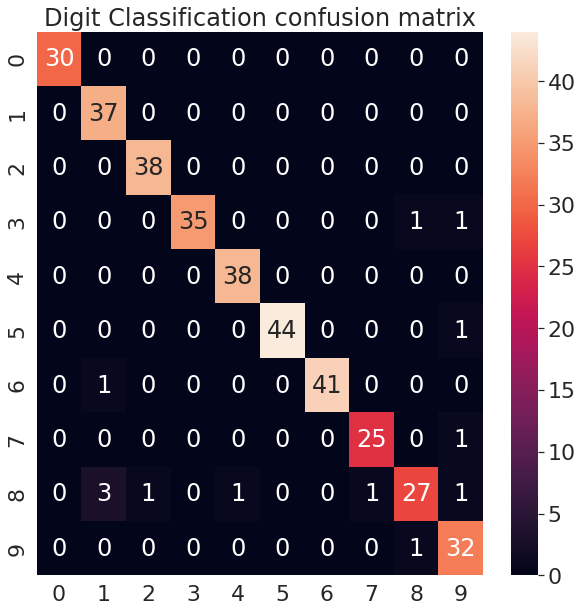

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
sns.set(font_scale=2)
# Dataframe 형태로 변환합니다.
df_cm = DataFrame(confu_mat, index=[i for i in "0123456789"],
                 columns= [i for i in "0123456789"])

plt.figure(figsize=(10,10))
plt.title('Digit Classification confusion matrix')
sns.heatmap(df_cm, annot=True)

소스코드(Source Code) 출처:https://eunguru.tistory.com/229

맨 처음에 그렸던 Region Boundary 보다는 훨씬 더 보기 깔끔한것 같습니다.

데이터의 대각선이 밝은 색을 띄고 있으므로 TP의 판별 비율이 매우 높은 것을 알 수 있습니다.

각 class 마다 표본 수 차이가 있으므로 class의 총 표본 수로 나눠 확률로 나타내겠습니다.

In [66]:
import numpy as np
from numpy import linalg as LA

#각 class 마다의 표본 개수를 구합니다.
total = np.sum(confu_mat, axis=1)
print(total)

[30 37 38 37 38 45 42 26 34 33]


In [68]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})
#float 자료형 자리수 조정:출처: https://ddochea.tistory.com/102 [또치의 삽질 보관함]
confu_mat_p = confu_mat/total[:,None]
confu_mat_p

array([[1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.95, 0.00, 0.00, 0.00, 0.00, 0.03, 0.03],
       [0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.98, 0.00, 0.00, 0.00, 0.02],
       [0.00, 0.02, 0.00, 0.00, 0.00, 0.00, 0.98, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.96, 0.00, 0.04],
       [0.00, 0.09, 0.03, 0.00, 0.03, 0.00, 0.00, 0.03, 0.79, 0.03],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.03, 0.97]])

<AxesSubplot:title={'center':'Digit Classification confusion matrix'}>

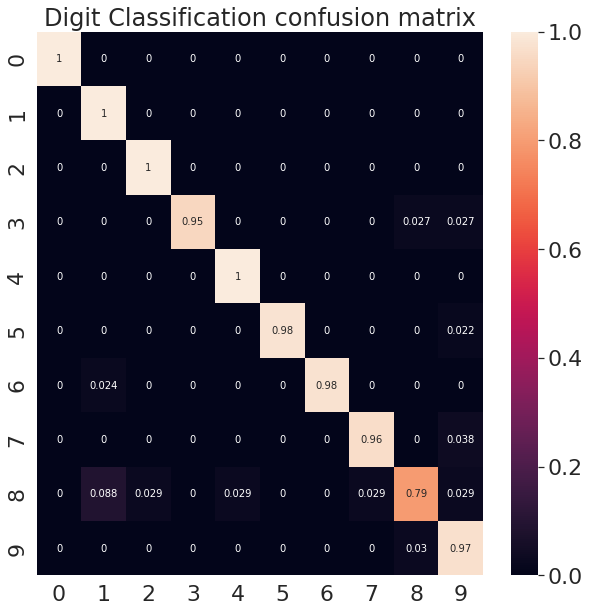

In [69]:
pd.options.display.float_format = '{:.2f}'.format
df_cm_ = DataFrame(confu_mat_p, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,10))
plt.title('Digit Classification confusion matrix')
# 글자 폰트 조정하는법 https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221952323204
sns.heatmap(df_cm_norm, annot=True ,annot_kws = {'size' : 10})

소스코드(Source Code) 출처:https://eunguru.tistory.com/229

**많은 양** 그리고 **다수의 class**를 가진 데이터를 model을 통해 훈련시켰을 때 **model의 성능을 직관적으로 시각화 시키는 방법**이

**혼동행렬을 이미지화** 시키는 것 같습니다.

### 3. SVM 모델 사용하기

In [82]:
#사이킷런으로부터 svm모델 가져옴 
from sklearn import svm
#svm모델을 svm_model에 할당.
svm_model = svm.SVC()
#svm모델을 학습
svm_model.fit(X_train, y_train)
y_pred =svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.93      1.00      0.96        37
           2       0.97      1.00      0.99        38
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        38
           5       1.00      0.98      0.99        45
           6       1.00      1.00      1.00        42
           7       1.00      0.96      0.98        26
           8       1.00      0.91      0.95        34
           9       0.94      1.00      0.97        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## 성능평가

SVM모델을 이용하여 모델을 훈련시킨 결과는 위의 표와 같습니다.precision ,recall,f1-score 그리고 macro avg까지 

**평균적으로** Random forest 모델보다 높은 정확도를 보여주었습니다. 마찬가지로 성능 지표가 너무 좋다보니 과적합 의심이 듭니다.





## Visualization

혼동행렬을 가지고 시각화 해보도록 하겠습니다.

<AxesSubplot:title={'center':'Digit Classification confusion matrix(SVM model)'}>

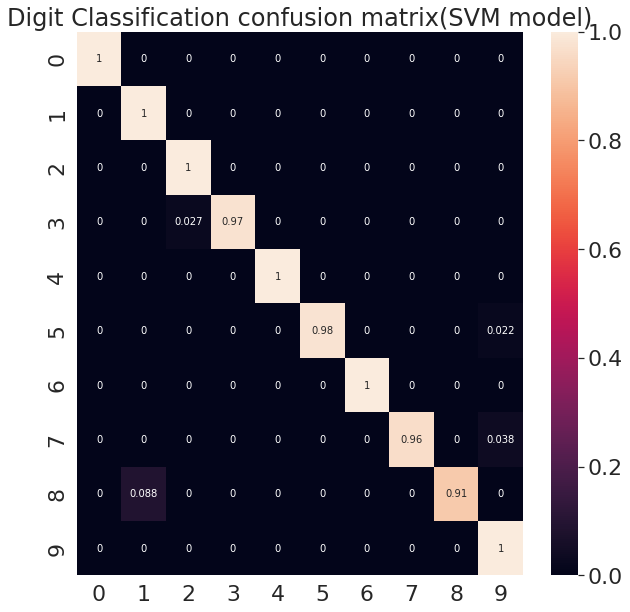

In [84]:
confu_mat_svm_dig = confusion_matrix(y_test, y_pred)

%matplotlib inline

sns.set(font_scale=2)

df_cm_svdig = DataFrame(confu_mat_svm_dig , index=[i for i in "0123456789"],
                 columns= [i for i in "0123456789"])

total = np.sum(confu_mat_svm_dig, axis=1)

np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

confu_mat_svdig_p = confu_mat_svm_dig/total[:,None]

pd.options.display.float_format = '{:.2f}'.format

df_cm_p_svdig = DataFrame(confu_mat_svdig_p, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])

plt.figure(figsize = (10,10))
plt.title('Digit Classification confusion matrix(SVM model)')

sns.heatmap(df_cm_p_svdig, annot=True ,annot_kws = {'size' : 10})

### 4. SGD Classifier 모델 사용하기

In [249]:
#사이킷런으로부터 SGDClassifier모델 가져옴
from sklearn.linear_model import SGDClassifier
#SGDClassifier모델을 sgd_model에 할당.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
#모델 학습
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
#SGDClassifier모델을 학습
y_pred=sgd_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.85      0.95      0.90        37
           2       1.00      0.97      0.99        38
           3       1.00      0.84      0.91        37
           4       1.00      1.00      1.00        38
           5       0.98      0.93      0.95        45
           6       1.00      1.00      1.00        42
           7       0.96      0.96      0.96        26
           8       0.88      0.85      0.87        34
           9       0.85      1.00      0.92        33

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



## 성능평가

3번째로 높은 F1-score 를 갖고 있습니다. 전체 표본에서 숫자 1을 구별하는 능력은 조금 낮습니다.
이외에는 준수하게 높은 성능 지표를 보여줍니다.

## Visualization

<AxesSubplot:title={'center':'Digit Classification confusion matrix(SGD model)'}>

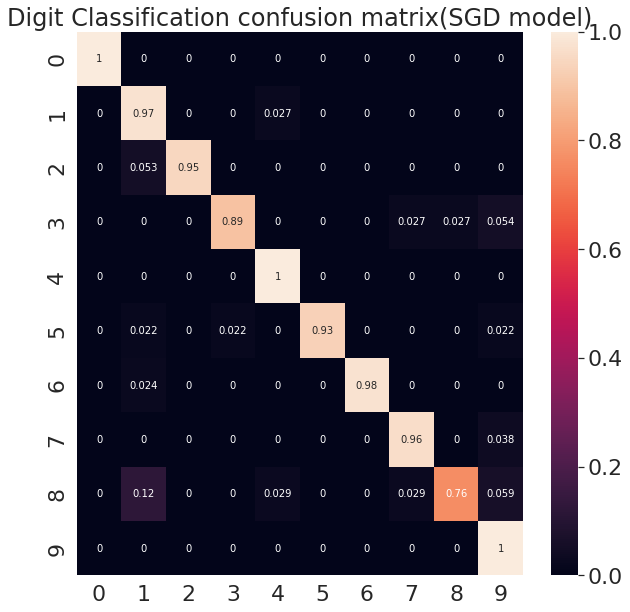

In [88]:
confu_mat_SGD_dig = confusion_matrix(y_test, y_pred)

%matplotlib inline

sns.set(font_scale=2)

df_cm_SGD_dig = DataFrame(confu_mat_SGD_dig, index=[i for i in "0123456789"],
                 columns= [i for i in "0123456789"])

total = np.sum(confu_mat_SGD_dig, axis=1)

np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

confu_mat_SGD_dig_p = confu_mat_SGD_dig/total[:,None]

pd.options.display.float_format = '{:.2f}'.format

df_cm_SGD_dig = DataFrame(confu_mat_SGD_dig_p, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])

plt.figure(figsize = (10,10))
plt.title('Digit Classification confusion matrix(SGD model)')

sns.heatmap(df_cm_SGD_dig, annot=True ,annot_kws = {'size' : 10})

### 5. Logistic Regression 모델 사용하기

In [95]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression 모델을 logistic_model에 할당
logistic_model = LogisticRegression()

#Logistic Regression 모델을 학습
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.85      0.92      0.88        37
           2       1.00      0.95      0.97        38
           3       0.97      0.92      0.94        37
           4       0.95      1.00      0.97        38
           5       0.98      0.96      0.97        45
           6       1.00      0.98      0.99        42
           7       0.96      0.92      0.94        26
           8       0.97      0.82      0.89        34
           9       0.82      1.00      0.90        33

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 음..? 뭔가 경고문이 뜹니다. 지금까지는 이런 일이 없었는데...무슨 이유일까요?


ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

문구에서 lbfgs failed to converge 라는 말은 lbfgs가 수렴에 실패했다는 말인것 같습니다.

또한 전체 ITERATIONS의 숫자가 limit에 걸렸다 합니다.

# 해결방법

https://blog.naver.com/tommybee/222663219411 에서는 문제의 원인이 max_iter 가 낮기 때문이라 합니다.

max_iter 의 default는 100이고 데이터의 개수가 꽤 많으므로, 이보다 큰 1000을 넣어보겠습니다.

In [78]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000 )

logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.85      0.95      0.90        37
           2       1.00      0.95      0.97        38
           3       0.97      0.92      0.94        37
           4       0.97      1.00      0.99        38
           5       0.98      0.96      0.97        45
           6       1.00      0.98      0.99        42
           7       0.96      0.96      0.96        26
           8       0.97      0.82      0.89        34
           9       0.85      1.00      0.92        33

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1000도 부족하다 합니다. 5000을 넣어보죠

In [89]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 5000 )

logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.85      0.95      0.90        37
           2       1.00      0.95      0.97        38
           3       0.97      0.92      0.94        37
           4       0.97      1.00      0.99        38
           5       0.98      0.96      0.97        45
           6       1.00      0.98      0.99        42
           7       0.96      0.96      0.96        26
           8       0.97      0.82      0.89        34
           9       0.85      1.00      0.92        33

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



경고 문구가 뜨지 않네요. 잘 해결된것 같습니다.

# 성능 평가

전체적으로 준수한 성능 지표를 보여줍니다. 신기한건 이번에도 전체 class중 숫자 1과 9를 구별하는 능력이 떨어지는 결과가 나왔습니다.

##  Visualization

<AxesSubplot:title={'center':'Digit Classification confusion matrix(Logistic Regression)'}>

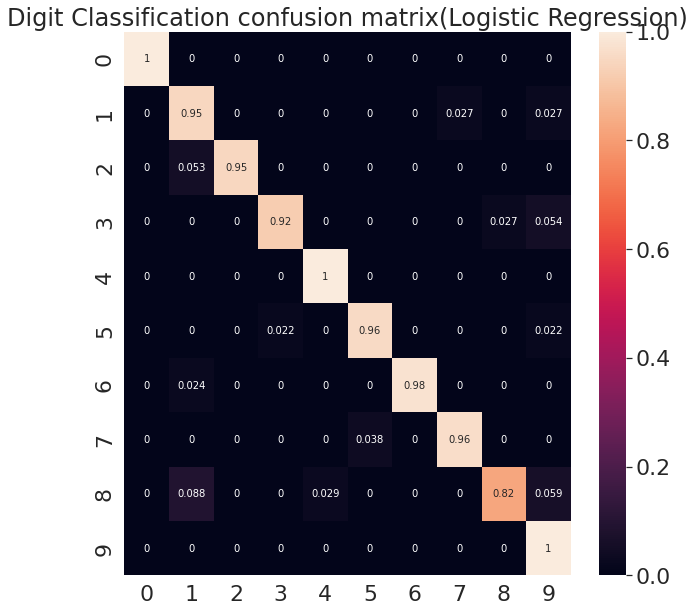

In [93]:
confu_mat_LgR_dig = confusion_matrix(y_test, y_pred)

%matplotlib inline

sns.set(font_scale=2)

df_cm_LgR_dig= DataFrame(confu_mat_LgR_dig, index=[i for i in "0123456789"],
                 columns= [i for i in "0123456789"])

total = np.sum(confu_mat_LgR_dig, axis=1)

np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

confu_mat_LgR_dig_p = confu_mat_LgR_dig/total[:,None]

pd.options.display.float_format = '{:.2f}'.format

df_cm_LgR_dig = DataFrame(confu_mat_LgR_dig_p, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])

plt.figure(figsize = (10,10))
plt.title('Digit Classification confusion matrix(Logistic Regression)')

sns.heatmap(df_cm_LgR_dig, annot=True ,annot_kws = {'size' : 10})

#  Project. 2 Wine Classification

데이터가 어떻게 생겼는지부터 볼게용

In [57]:
#scikitlearn 라이브러리로부터 wine의 데이터셋 가져오기.
from sklearn.datasets import load_wine
wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

분류할 class 부터 보겠습니다.

In [58]:
print(wine_label.shape)
print(wine.target_names)

(178,)
['class_0' 'class_1' 'class_2']


심플하게 3개의 클래스로 나누라는 군요. 3개의 클래스라면 위에서 사용했던 **Boundary Region** 을 사용할 수 있지 않을까요?

다음은 feature들을 보겠습니다.

In [59]:
print(wine_data.shape)
print(wine.feature_names)

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [112]:
wine_data[:1]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03]])

여기서 쓸모없는 데이터가 있을지도 모르니 DESCR을 보도록 하겠습니다.

In [60]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

'chemical analysis of wines grown in the same region in Italy by three different cultivators'

같은 지역의 서로 다른 세명의 경작자에게서 얻은 와인을 화학적으로 분석한 데이터라는군요. 

쓸모 없는 데이터는 없는것 같습니다.

### 1. Decision Tree모델 사용하기

In [61]:
#scikitlearn 라이브러리로부터 wine의 데이터셋 가져오기.
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
# Decision Tree 모델을 가져옴
from sklearn.tree import DecisionTreeClassifier
#훈련, 테스트 데이터 분류
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=13)

#Decision Tree 모델 학습.
decision_tree_w = DecisionTreeClassifier(random_state=32)
decision_tree_w.fit(X_train, y_train)
y_pred = decision_tree_w.predict(X_test)
#예측 데이터값 지표 출력
#이 이후로는 classification_report를 불러낼 필요가 없습니다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.87      0.87      0.87        15
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



# 성능 평가

역시나 기존에 보았던 모델보다는 낮은 성능을 보이고 있습니다. 데이터의 갯수도 얼마 없어 한 두개만 틀려도 성능에 영향이 클 것 같습니다.

## Visualization

드디어.. 영역 지도를 그릴때가 온 것 같습니다!

Text(0.5, 1.0, 'DecisionTreeClassifier Region Boundary for wine')

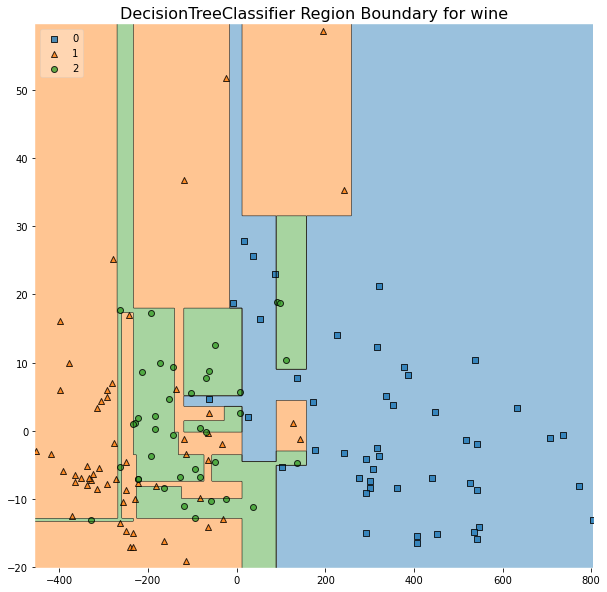

In [169]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) 
clf = DecisionTreeClassifier(random_state=32)


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('DecisionTreeClassifier Region Boundary for wine', size=16)

# ~어째서...?~

보다시피 과적합된 모델임이 자명해보입니다. 실망을 금할 수 없군요

### 2. Random Forest 모델 사용하기

In [168]:
#랜덤 포레스트 모델가져오기.
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=13)


random_forest = RandomForestClassifier(random_state=32)
# 랜덤 포레스트 모델 학습시키기.
RFC_model_w = RandomForestClassifier(random_state=32)
RFC_model_w.fit(X_train,y_train)

# 예측하기
y_pred = RFC_model_w.predict(X_test)

# 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 성능 평가
완벽하게 분류했다는 믿기 힘든 결과가 나오네요 진짜일까요? 과적합이 더 심해진것 같습니다.

## Visualization

Text(0.5, 1.0, 'RandomForest model Region Boundary for wine')

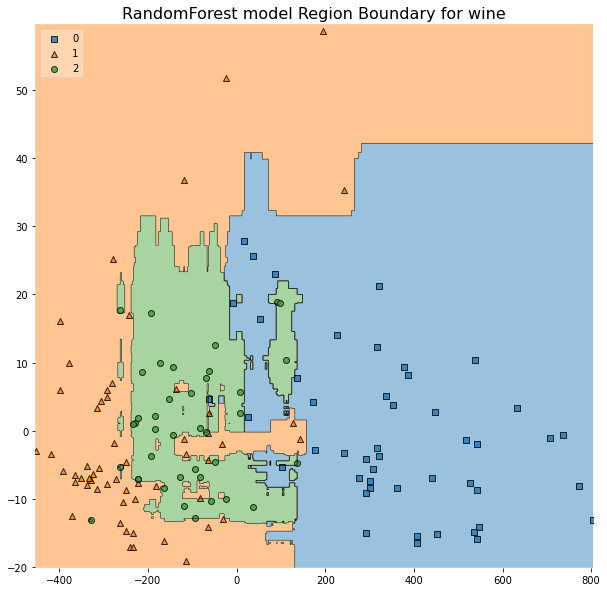

In [167]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) 
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=13)


clf = RandomForestClassifier(random_state=32)

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('RandomForest model Region Boundary for wine', size=16)

Decision Tree모델 보다는 낫지만 보시다시피 영역들의 사이사이에 다른 영역이 침범해 있는것을 알 수 있습니다.

과적합된 모델 같습니다.

###  3. SVM 모델 사용하기

In [65]:
#SVM모델 가져오기.
from sklearn import svm

svm_model_w = svm.SVC()

#모델 학습시키기
svm_model_w.fit(X_train, y_train)
y_pred =svm_model_w.predict(X_test)
# 결과 출력하기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      0.73      0.73        15
           2       0.56      0.56      0.56         9

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



## 성능 평가

이번 SVM모델은 정확도와 지표가 그리 높지는 않습니다. 하지만 class 0 에 대한 분류는 100%인 점이 조금 걸립니다.

시각화 시켜보면 왜 그런지 알 수 있을 것 같습니다.

## Visualization

### 훈련 시각화

Text(0.5, 1.0, 'SVM model Region Boundary for wine')

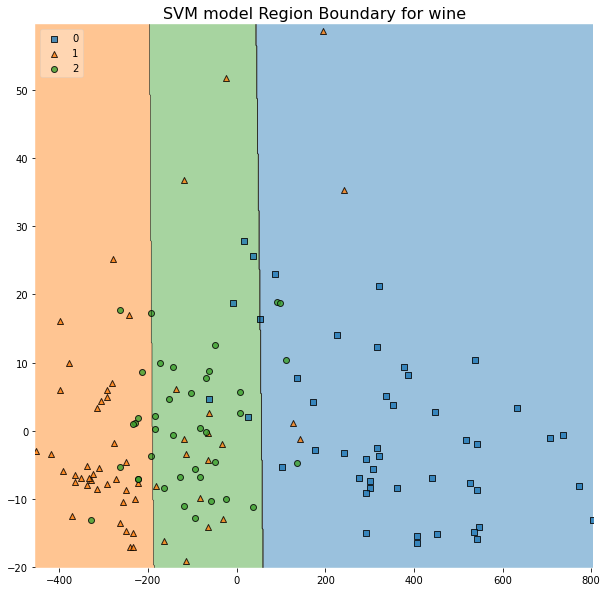

In [82]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) #figure size 지정.
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
clf = svm.SVC()

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('SVM model Region Boundary for wine', size=16)

### 테스트 결과 시각화

Text(0.5, 1.0, 'SVM model Region Boundary for wine')

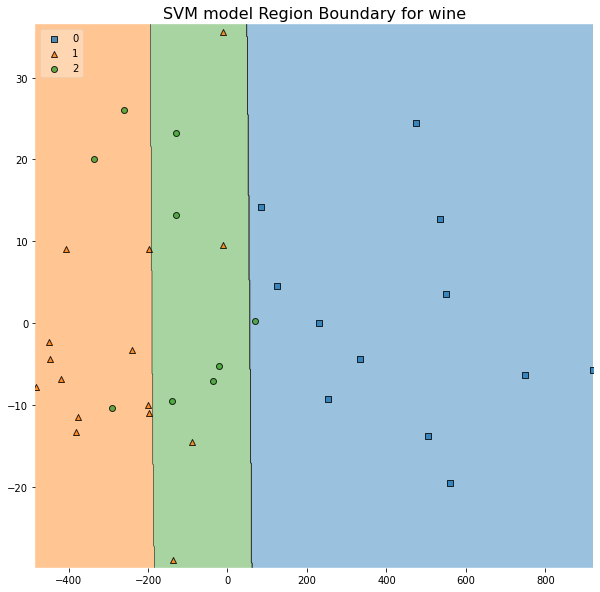

In [84]:
plt.figure(figsize=(10,10))
X_test2 = pca.fit_transform(X_test)
plot_decision_regions(X=X_test2,y=y_test, clf=clf, legend=2 )
plt.title('SVM model Region Boundary for wine', size=16)

테스트 결과를 시각화 해보니 class 0 에 대해 precision과 recall이 100%인 이유를 알것 같습니다.

**우연히 test data가 다 class 0의 영역에 있었던 것**이지요.

이는 test셋과 train셋을 분리시킬때의 난수 seed를 변경한다면 결과가 달라질 것으로 예상됩니다.

### 4. SGD Classifier 모델 사용하기

In [119]:
#scikitlearn 라이브러리로부터 wine의 데이터셋 가져오기.
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
#사이킷런으로부터 SGDClassifier모델 가져옴
from sklearn.linear_model import SGDClassifier
#훈련, 테스트 데이터 분류
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.20, 
                                                    random_state=103)

#SGDClassifier모델을 sgd_model에 할당.
#
sgd_model_w = SGDClassifier()
#SGDClassifier모델을 학습
sgd_model_w.fit(X_train,y_train)

# 예측하기
y_pred = sgd_model_w.predict(X_test)
# 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.58      1.00      0.73        15
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.53      0.64      0.56        36
weighted avg       0.55      0.69      0.60        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 성능 평가

분류를 제대로 해내지 못합니다. 심지어 이상한 경고도 날라옵니다. 멘붕에 빠졌습니다.

스택오버플로우의 어떤 형님(혹은 누님)께서 저 경고문이 뜨는 이유를 알려주셨습니다.

This warning occurs because y_true contains labels that are not present in your predictions (y_pred) ~~ that there is a problem with your classifier.

해석하자면

**'니가 갖고있는 y_true값의 라벨이 모델이 예측한 y_pred 와 일치하지 않는다. 니 모델이 잘못된거임'**

심지어 저 코드를 한번 실행했을 때는 문제가 없다가, 여러번 실행하면 꼭 저 경고 문구가 나옵니다.

SGD Classifier는 한번만 사용해야 하는 모델이었을까요?

## Visualization

Text(0.5, 1.0, 'SGD Classifier model Region Boundary for wine')

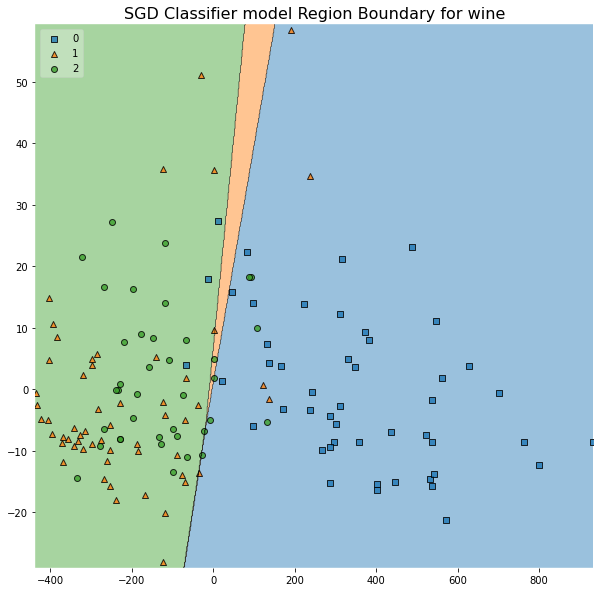

In [130]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) #figure size 지정.
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=103)
clf = SGDClassifier()

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('SGD Classifier model Region Boundary for wine', size=16)

성능이 안나오는 이유를 알 것 같은 그림입니다. 

**하지만 왜! 손글씨 분류는 높은 정확도를 가진건지 모르겠습니다.**

데이터의 갯수가 모자라서 였을까요?

### 5. Logistic Regression 모델 사용하기

In [99]:
from sklearn.linear_model import LogisticRegression
logistic_model_w = LogisticRegression(max_iter = 5000)

logistic_model_w.fit(X_train,y_train)
y_pred = logistic_model_w.predict(X_test)
# 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



# 성능평가

역시 리니어 모델 집안의 누군가완 다르게 성능이 정말 좋네요.

# Visualization

Text(0.5, 1.0, 'Logistic Regression model Region Boundary for wine')

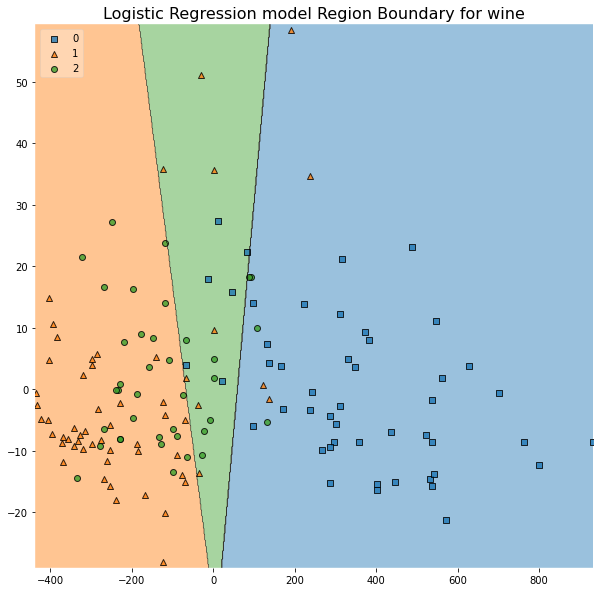

In [126]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) #figure size 지정.
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_data =  wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=103)
clf =  LogisticRegression(max_iter = 5000)

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('Logistic Regression model Region Boundary for wine', size=16)

이번엔 과적합 때문이 아닌 SVM 모델에서와 같이 테스트용 데이터가 우연히 저 영역에 잘 들어맞았기 때문에 위의 결과를 보이는 것 같습니다.

# Project.3 Breast Cancer Clasification.

# 데이터 뜯어보기

In [148]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [149]:
#dir 함수를 사용해 데이터셋에서 name space 에 기록된 이름들을 출력합니다.  
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [150]:
breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

In [151]:
print(breast_cancer_data.shape)
print(breast_cancer_label.shape)

(569, 30)
(569,)


569개의 데이터와 30개의 column들이 있는것을 확인할 수 있습니다.

cloumn에는 어떤 feature name이 있는지, 어떤 데이터가 들어 있는지 확인 합니다.

In [152]:
print(breast_cancer.feature_names)
print(breast_cancer_data[:1])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]


많은 종류의 float 형 feature 들이 들어있는 것을 확인했습니다.

다음으론 분류할 class들을 확인해보겠습니다.

In [153]:
print(breast_cancer.target_names)
print(breast_cancer_label[:5])

['malignant' 'benign']
[0 0 0 0 0]


label데이터는 양성과 음성을 진단하는 것이라고 생각하면 될 것 같습니다.

그렇다면 Boundary를 그리는 그래프를 그린다면 분류가 잘 되었는지 안되었는지 직관적인 확인이 쉬울 것 같습니다.

첫 행부터 5번째 행 까지는 모두 음성이네요.

데이터에 대한 Describe도 보도록 하겠습니다.

In [154]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

양성은 357개 음성은 212개를 갖는다 합니다.

In [158]:
type(breast_cancer_label)
a = (breast_cancer_label == 1).sum()
a

357

따라서 class는 1은 양성 0은 음성으로 분류했음을 알 수 있습니다.

### 1. Decision Tree모델 사용하기

In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
#모델 학습
decision_tree_b = DecisionTreeClassifier(random_state=32)
decision_tree_b.fit(X_train, y_train)
y_pred = decision_tree_b.predict(X_test)
#예측 데이터값 지표 출력
#이 이후로는 classification_report를 불러낼 필요가 없습니다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78        36
           1       0.95      0.79      0.87        78

    accuracy                           0.83       114
   macro avg       0.81      0.86      0.82       114
weighted avg       0.87      0.83      0.84       114



# 성능평가

유방암의 경우 양성을 양성으로 판단해야 하는 recall 의 수치가 훨씬 중요합니다.

양성은 1 음성은 0 이므로 실제 양성을 양성으로 판단할 확률이 79%정도임을 알 수 있습니다. 성능이 좋지는 않습니다.

## Visualization

Text(0.5, 1.0, 'DecisionTreeClassifier model Region Boundary for breast cancer')

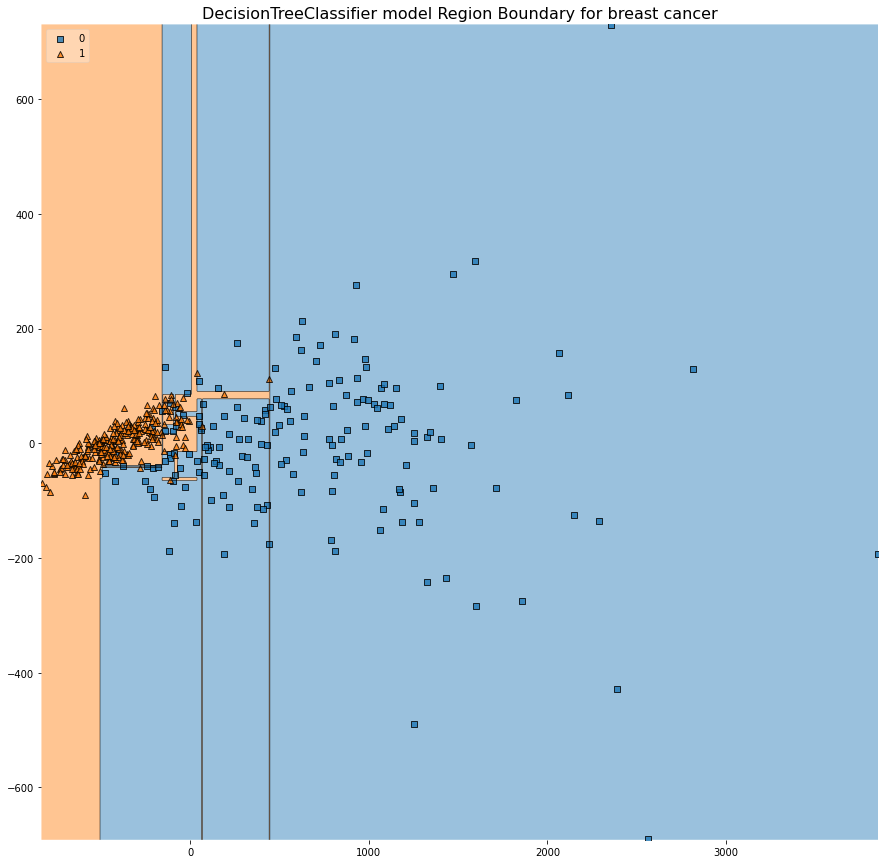

In [173]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(15,15)) 

from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
clf = DecisionTreeClassifier(random_state=32)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('DecisionTreeClassifier model Region Boundary for breast cancer', size=16)

일부 영역에서 decision 노드가 가지를 뻗은 것을 확인 할 수 있습니다. 

이유는 양성 case가 음성과 비슷한 영역에 있어서 저렇게 된 것 같습니다.

###  2. Random Forest 모델 사용하기

In [161]:
#앙상블 모듈에서 Random Forest 모델을 가져옴.
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 학습시키기.
random_forest_b = RandomForestClassifier(random_state=32)
random_forest_b.fit(X_train, y_train)
y_pred = random_forest_b.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        36
           1       0.99      0.91      0.95        78

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114



## 성능평가

이번에는 class 1 에 대한 recall의 정확도가 91%까지 올라왔습니다. 91%확률로 암을 진단한다고 할 수 있겠습니다.

## Visualization

Text(0.5, 1.0, 'RandomForest model Region Boundary for breast cancer')

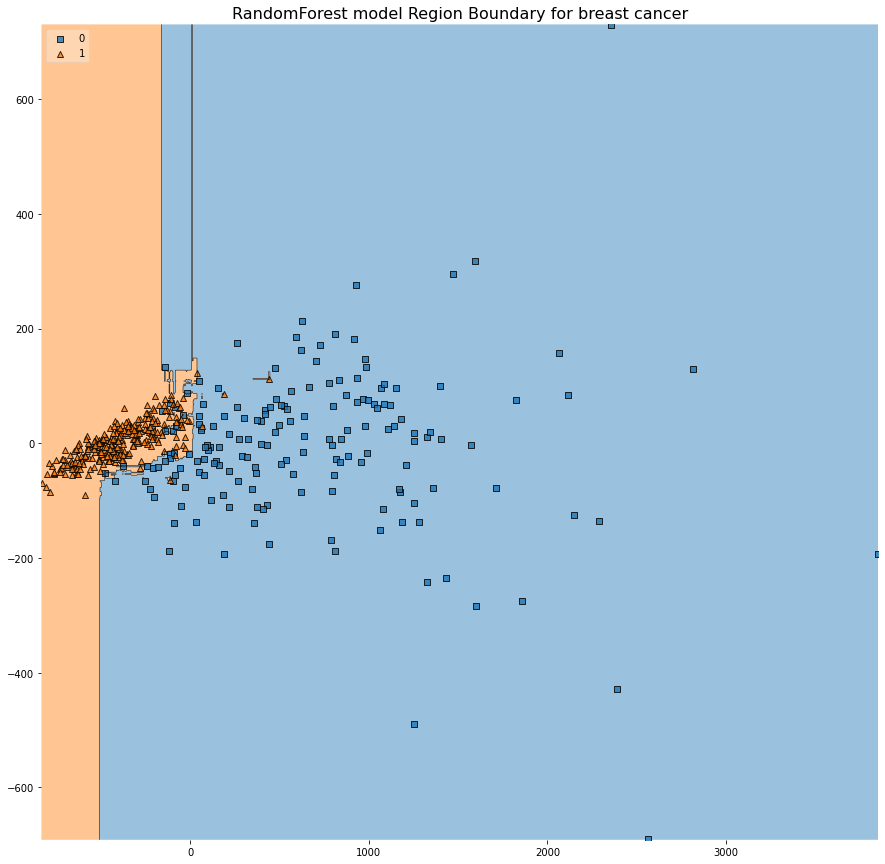

In [171]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(15,15)) 
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
clf = RandomForestClassifier(random_state=32)

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('RandomForest model Region Boundary for breast cancer', size=16)

영역이 좀 더 정갈해졌습니다.

###  3. SVM 모델 사용하기

In [254]:
#사이킷런으로부터 svm모델 가져옴 
from sklearn import svm
#svm모델을 svm_model에 할당.
svm_model_b = svm.SVC()
#svm모델을 학습
svm_model_b.fit(X_train, y_train)
y_pred =svm_model_b.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.89      0.94      0.91        78

    accuracy                           0.88       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.88      0.88      0.88       114



## 성능평가

SVM모델의 경우 class 1에 대한 recall이 더욱 높아졌습니다. 반대로 class 0의 recall이 낮은 성능을 보입니다.

이는 class 1이 class0의 영역을 많이 차지하여 recall이 올라가고 반대로 class 0의 영역은 상대적으로 축소되었다고 짐작할 수 있습니다.

## Visualization

Text(0.5, 1.0, 'SVM model Region Boundary for breast cancer')

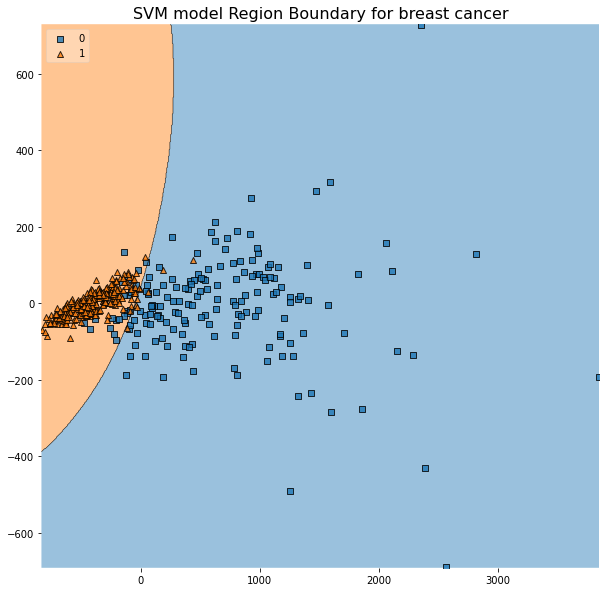

In [191]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) #figure size 지정.
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)

clf = svm.SVC()

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('SVM model Region Boundary for breast cancer', size=16)

진단 정확도가 늘어난 이유를 알 수 있습니다.

Train set 내의 영역에서 class 1 영역에 대부분의 class 1 데이터가 들어있음을 알 수 있습니다.

### 4. SGD Classifier 모델 사용하기

In [250]:
#사이킷런으로부터 SGDClassifier모델 가져옴
from sklearn.linear_model import SGDClassifier

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)
#SGDClassifier모델을 sgd_model에 할당.
sgd_model_b = SGDClassifier()
sgd_model_b.fit(X_train,y_train)

#SGDClassifier모델을 학습
y_pred = sgd_model_b.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.88      0.97      0.93        78

    accuracy                           0.89       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.89      0.89       114



## 성능평가

class 1에 대한 Recall을 보면 97%입니다. 하지만 그에 반해 class 0에 대한 recall의 정확도가 낮은 것을 보면

위에서와 마찬가지의 이유라고 짐작할 수 있습니다.

## Visualization

Text(0.5, 1.0, 'SGD Classifier model Region Boundary for breast cancer')

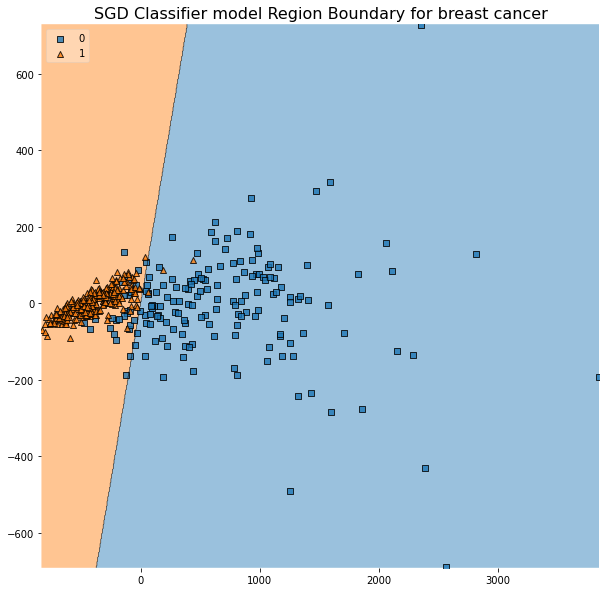

In [251]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10)) #figure size 지정.
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label =breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=13)

clf = SGDClassifier()

#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title('SGD Classifier model Region Boundary for breast cancer', size=16)

### 5. Logistic Regression 모델 사용하기

In [256]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression 모델을 logistic_model에 할당
logistic_model_b = LogisticRegression(max_iter = 5000)

#Logistic Regression 모델을 학습
logistic_model_b.fit(X_train,y_train)
y_pred = logistic_model_b.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.94      0.95      0.94        78

    accuracy                           0.92       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



## 성능평가

다른 지표들과 다른점이 있다면 recall의 성능이 class 1과 class 0 모두 준수한 수준으로 올라갔습니다.

따라서 breast cancer 모델을 분류하기에 최적의 성능을 보여준다 할 수 있습니다.

## Visualization

Text(0.5, 1.0, ' Logistic Regression model Region Boundary for breast cancer')

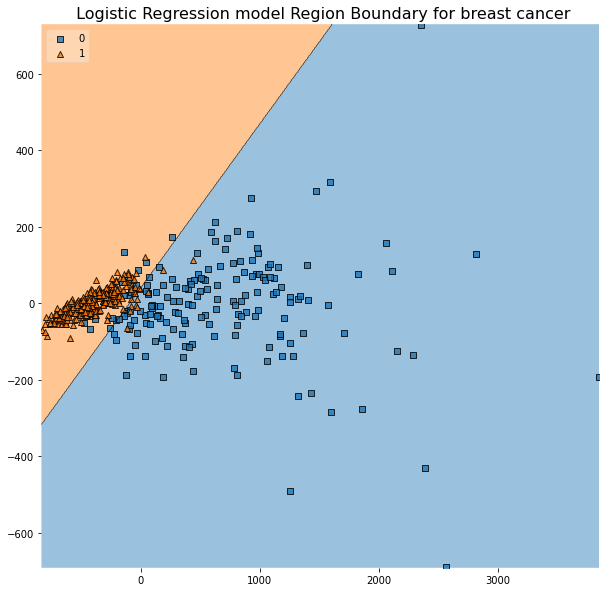

In [255]:
clf =  LogisticRegression(max_iter = 5000)
plt.figure(figsize=(10,10))
#고차원 배열을 저차원으로 만들어준다 합니다.
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
#모델을 훈련.
clf.fit(X_train2, y_train)
plot_decision_regions(X=X_train2,y=y_train, clf=clf, legend=2 )
plt.title(' Logistic Regression model Region Boundary for breast cancer', size=16)

예상대로 Boundary를 나눈 영역이 위의 SVM,SGDC모델과 비슷하지만 조금 더 경사져 있습니다. 

이 정도라면 일반적인 breast cancer의 데이터를 잘 분류할 것 같습니다.

# 마치며

이번 Exploration노드를 진행하면서 다양한 데이터셋을 사용하고 다양한 모델들을 사용하여 어떤 모델이 적합한지에 대해 알아보았습니다.

첫번째 프로젝트에서는 많은 종류의 feature 데이터와 class를 가진, 그만큼 많은 양의 데이터를 분류했고 

두번째 프로젝트에서는 적은 갯수, 적은 종류의 class, feature를 가진 데이터를 분류했으며

세번째 프로젝트에서는 첫번째 보다는 적지만 두번째 보단 많은 갯수의 데이터에서 30종의 feature를 가진 데이터를 이진class로 분류 했었습니다.
\
\
\
**어떤 프로젝트이던 간에 쉬운것은 없었습니다. 모델링을 하면서도 그렇고 시각화를 하면서도 그랬습니다.**

어떤 프로젝트에서는 모델을 피팅하고 결과를 출력하는 과정에서 알 수 없는 원인으로 성능을 제대로 측정할 수 없었고, 

어떤 프로젝트는 모델의 훈련 결과를 가지고 Visualization했을 때 figure가 제대로 그려지지 않아 애를 먹기도 했었습니다.
\
\
\
시간이 조금 더 많았다면 **데이터를 전처리하여 모델의 성능을 높이거나, 다른 방법으로 figure를 그려 모델의 성능을 더 쉽게**

**이해할 수 있는 방법으로 표현하지 못했던 것, 다른 모델을 사용하여 분류하지 못했던 것이 아쉬울 따름입니다.**
\
\
\
\
\
첫번째 프로젝트를 진행하면서 Boundary Region으로 Visualization 했을 때, **많은 수와 class를 가진 데이터셋**은 Boundary Region으로 나타냈을 때

데이터를 **어떤 영역으로 분류를 얼마나 잘 했는지를 직관적으로 이해하기 어렵기 때문에**

**Confusion Matrix로 나타내는 것**이 모델의 성능 지표를 이해하기에 더 적합하다는 결론을 내렸습니다.

시간이 있었다면 다른 방법도 사용했을 것입니다만... 

첫번째와 두번째 모두 F1-score을 중점적으로 보며 모델의 성능을 평가했습니다. 
\
\
\
\
결론적으로 첫번째의 경우 가장 성능이 좋았던 모델은 SVM모델이었습니다. 이상하게도 SVM 모델은 첫번째 프로젝트를 제외하고는 

다른 프로젝트에선 주목할 만한 성능을 내지 못했습니다. 추측할 수 있는것은 SVM모델은 **데이터의 갯수가 많을 수록 정확한 분류**를 하는게 아닐까 싶습니다.
\
\
\
\
두번째 모델을 진행하면서 당황했던 것은 다른 데이터 셋(손글씨, 유방암)에서는 잘 작동했던 SGDC모델이 실행하면 실행 할 수 록 일정한 지표를 뽑아내지 못했을 뿐 아니라

분류에 아예 실패하기도 했다는 점입니다. 결국 이 문제를 해결하지 못했고 원인을 모르니 더 아쉬웠던 프로젝트였습니다.

두 번째 프로젝트에선 Logistic Regression이 매우 우수한 성능을 발휘했는데. 데이터 수가 적었음에도 좋은 성능을 발휘했던 것이

신기했습니다. 아마 첫번째 프로젝트에서 Logistic Regression의 옵션 중 max_iter = 5000으로 설정한 것이 모델의 학습이 제대로  실행되지 않던 문제를 해결하면서 성능 또한 높였을 것일거라 생각합니다.

찾아보니 max_iter가 높을수록 과적합이 발생할 확률이 높다 했는데 두번째와 세번째 모두 그런 경향은 발견되지 않았습니다.
\
\
\
\
세 번째 프로젝트는 분류 문제지만 유방암 진단이라는 특수한 상황을 데이터를 통해 예측해야 하기 때문에 다른 정확도 보다는 Recall에 중점을 두고 Recall 성능이 가장 좋은 모델을 선정했습니다.

다른 모델들은 과적합 의심또는 어딘가 나사 빠진 지표를 보였기 때문에 class0,1모두 일괄적으로 recall 지표가 가장 높았기 때문에  Logistic Regression이 유방암 진단에 대한 예측으로써 최적의 모델이라 판단하게 되었습니다.
\
\
\
\
따라서 앞으로 분류 모델을 사용한다면 우선적으로 **Logistic Regression모델을 통해 학습시키는것을 고려할 것 같습니다.**

하지만 DecisionTree모델은 고려하지 않을 것 같습니다. 전체적으로 성능이 매우 안좋았기 때문입니다.

※파일 제목은 작업하며 들은 노래입니다.